In [19]:
!pip install openai

In [20]:
from openai import OpenAI

client = OpenAI(
    api_key = 'sk-------'
)

# 第一次finetune: Version 1

In [ ]:
finetune_file_path = '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_file.jsonl'

In [ ]:
client.files.create(
  file=open(finetune_file_path, "rb"),
  purpose="fine-tune"
)

FileObject(id='file-3LV7DpPoqtB5sZoercOo9bwV', bytes=51101, created_at=1711002979, filename='finetune_file.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
response = client.fine_tuning.jobs.create(
  training_file = 'file-3LV7DpPoqtB5sZoercOo9bwV',
  model = "gpt-3.5-turbo",
  suffix = 'HarryPotter'
)
response

FineTuningJob(id='ftjob-9djxmFXhWlaoFJpcSmvteyKs', created_at=1711003158, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-3LV7DpPoqtB5sZoercOo9bwV', validation_file=None, user_provided_suffix='HarryPotter')

In [ ]:
client.fine_tuning.jobs.list()

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-9djxmFXhWlaoFJpcSmvteyKs', created_at=1711003158, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='running', trained_tokens=None, training_file='file-3LV7DpPoqtB5sZoercOo9bwV', validation_file=None, user_provided_suffix='HarryPotter'), FineTuningJob(id='ftjob-VIHU2vyWnttyakcoQ2KgWk5H', created_at=1711002991, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='running', trained_tokens=None, training_file=

n_epochs = 3, batch_size = 1, learning_rate_multiplier = 2

In [ ]:
response = client.fine_tuning.jobs.retrieve('ftjob-9djxmFXhWlaoFJpcSmvteyKs')
response

FineTuningJob(id='ftjob-9djxmFXhWlaoFJpcSmvteyKs', created_at=1711003158, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:harrypotter:956jwUAk', finished_at=1711004575, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-cowhiCCxxSrF16vlXEXwYP9X'], status='succeeded', trained_tokens=47013, training_file='file-3LV7DpPoqtB5sZoercOo9bwV', validation_file=None, user_provided_suffix='HarryPotter')

In [ ]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal:harrypotter:956jwUAk


經過測試，此模型會持續回答「你是誰」


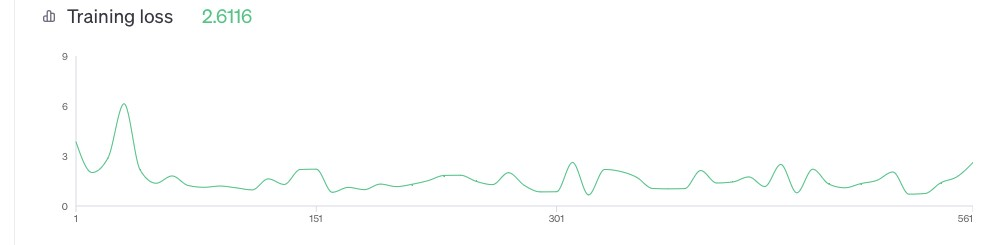

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/Version1_training_loss1.jpeg'))


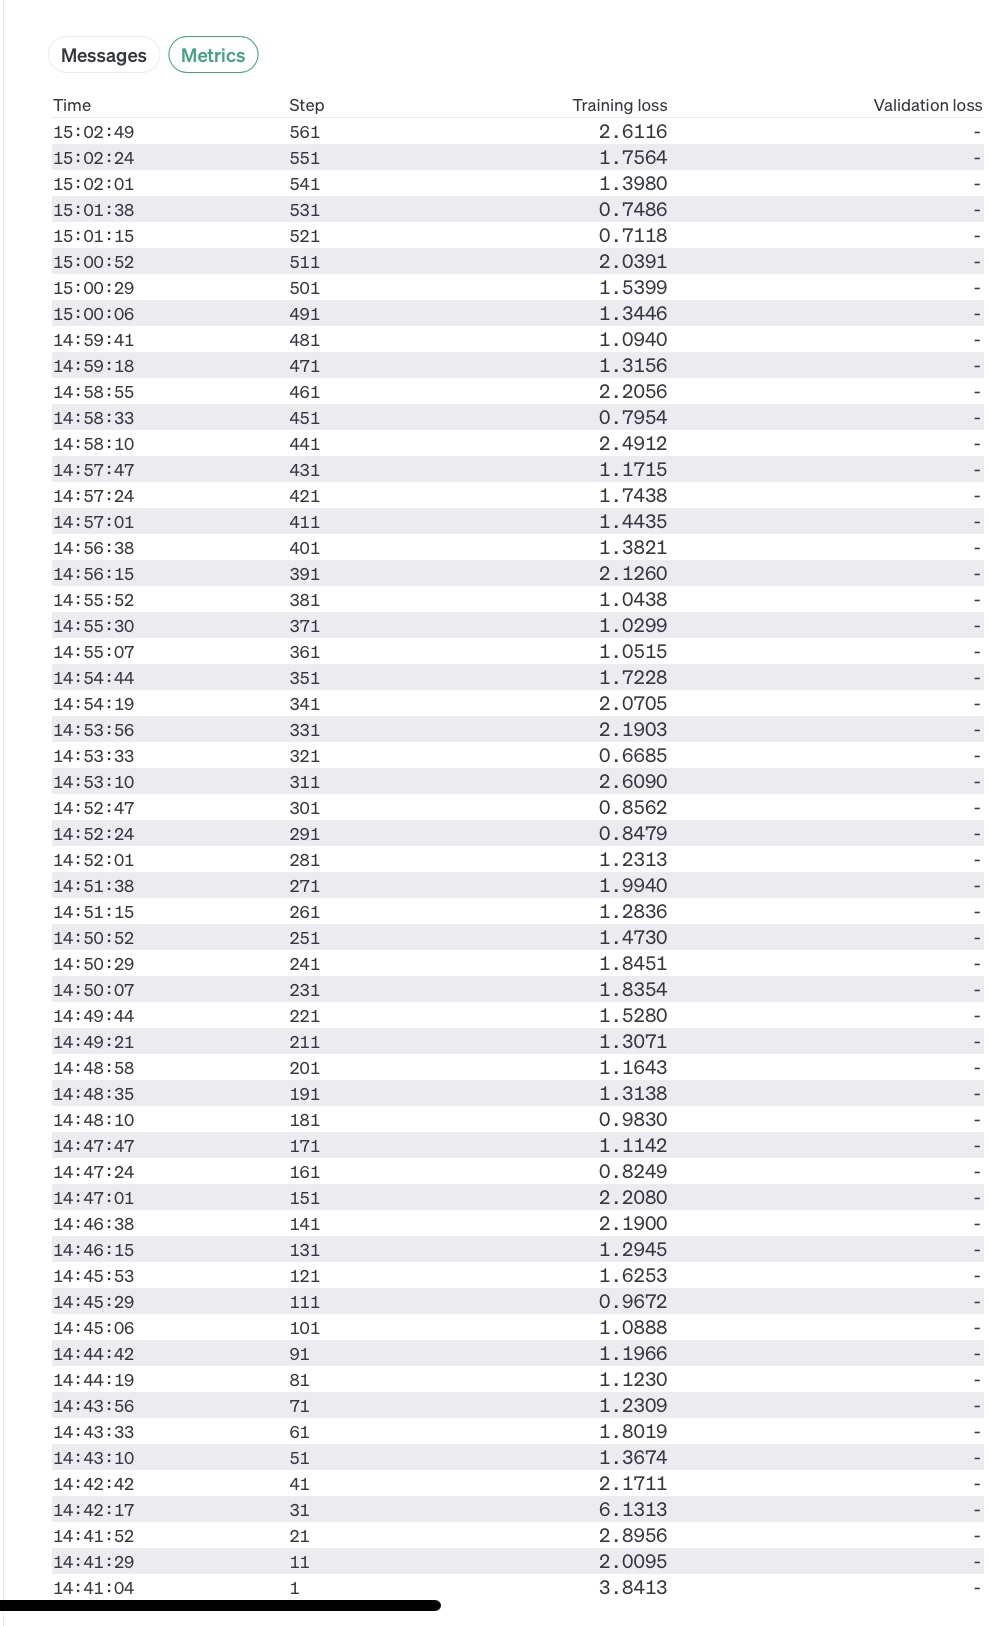

In [ ]:
display(Image('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/Version1_training_loss2.jpeg'))

# 第二次fine-tune: Version 2

In [ ]:
import pandas as pd
import json

# Load the fine-tuning data
with open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_file.jsonl', 'r') as file:
    lines = file.readlines()
    fine_tune_data = [json.loads(line) for line in lines]

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(fine_tune_data)

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)

# Define the size of the validation set
validation_size = int(0.1 * len(df_shuffled))  # 10% for validation

# Split into training and validation sets
validation_data = df_shuffled[:validation_size]
training_data = df_shuffled[validation_size:]

# Convert back to list of dict format for saving as JSONL
training_data_records = training_data.to_dict(orient='records')
validation_data_records = validation_data.to_dict(orient='records')

# Function to save data in JSONL format
def save_jsonl(data_records, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for record in data_records:
            file.write(json.dumps(record, ensure_ascii=False) + '\n')

# Save the training and validation data
save_jsonl(training_data_records, '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data.jsonl')
save_jsonl(validation_data_records, '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data.jsonl')

# Return paths to saved files
('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data.jsonl', '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data.jsonl')


('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data.jsonl',
 '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data.jsonl')

In [ ]:
# Training data
client.files.create(
  file=open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-EK7HFKFxELxOtJwJQmuDdqT0', bytes=45962, created_at=1711013452, filename='training_data.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
# Validation data
client.files.create(
  file=open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-MrCzfYlAHIv8g7vS89oBwmWK', bytes=5139, created_at=1711013455, filename='validation_data.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
client.fine_tuning.jobs.create(
  training_file="file-EK7HFKFxELxOtJwJQmuDdqT0",
  validation_file="file-MrCzfYlAHIv8g7vS89oBwmWK",
  model="gpt-3.5-turbo"
)

FineTuningJob(id='ftjob-OJPYT3b4PEAuWZAn10Vk9vDC', created_at=1711013519, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
client.fine_tuning.jobs.list()

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-OJPYT3b4PEAuWZAn10Vk9vDC', created_at=1711013519, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::959MZ7tW', finished_at=1711014658, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-uIVYJRpQMkWVTnlqEqL6tr8g'], status='succeeded', trained_tokens=42162, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None), FineTuningJob(id='ftjob-9djxmFXhWlaoFJpcSmvteyKs', created_at=1711003158, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:harrypotter:956jwUAk', finished_at=1711004575, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-

In [ ]:
response = client.fine_tuning.jobs.retrieve('ftjob-9djxmFXhWlaoFJpcSmvteyKs')
response

FineTuningJob(id='ftjob-OJPYT3b4PEAuWZAn10Vk9vDC', created_at=1711013519, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::959MZ7tW', finished_at=1711014658, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-uIVYJRpQMkWVTnlqEqL6tr8g'], status='succeeded', trained_tokens=42162, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::959MZ7tW


哈利的回應變得十分簡短，但是內容變得比較自然

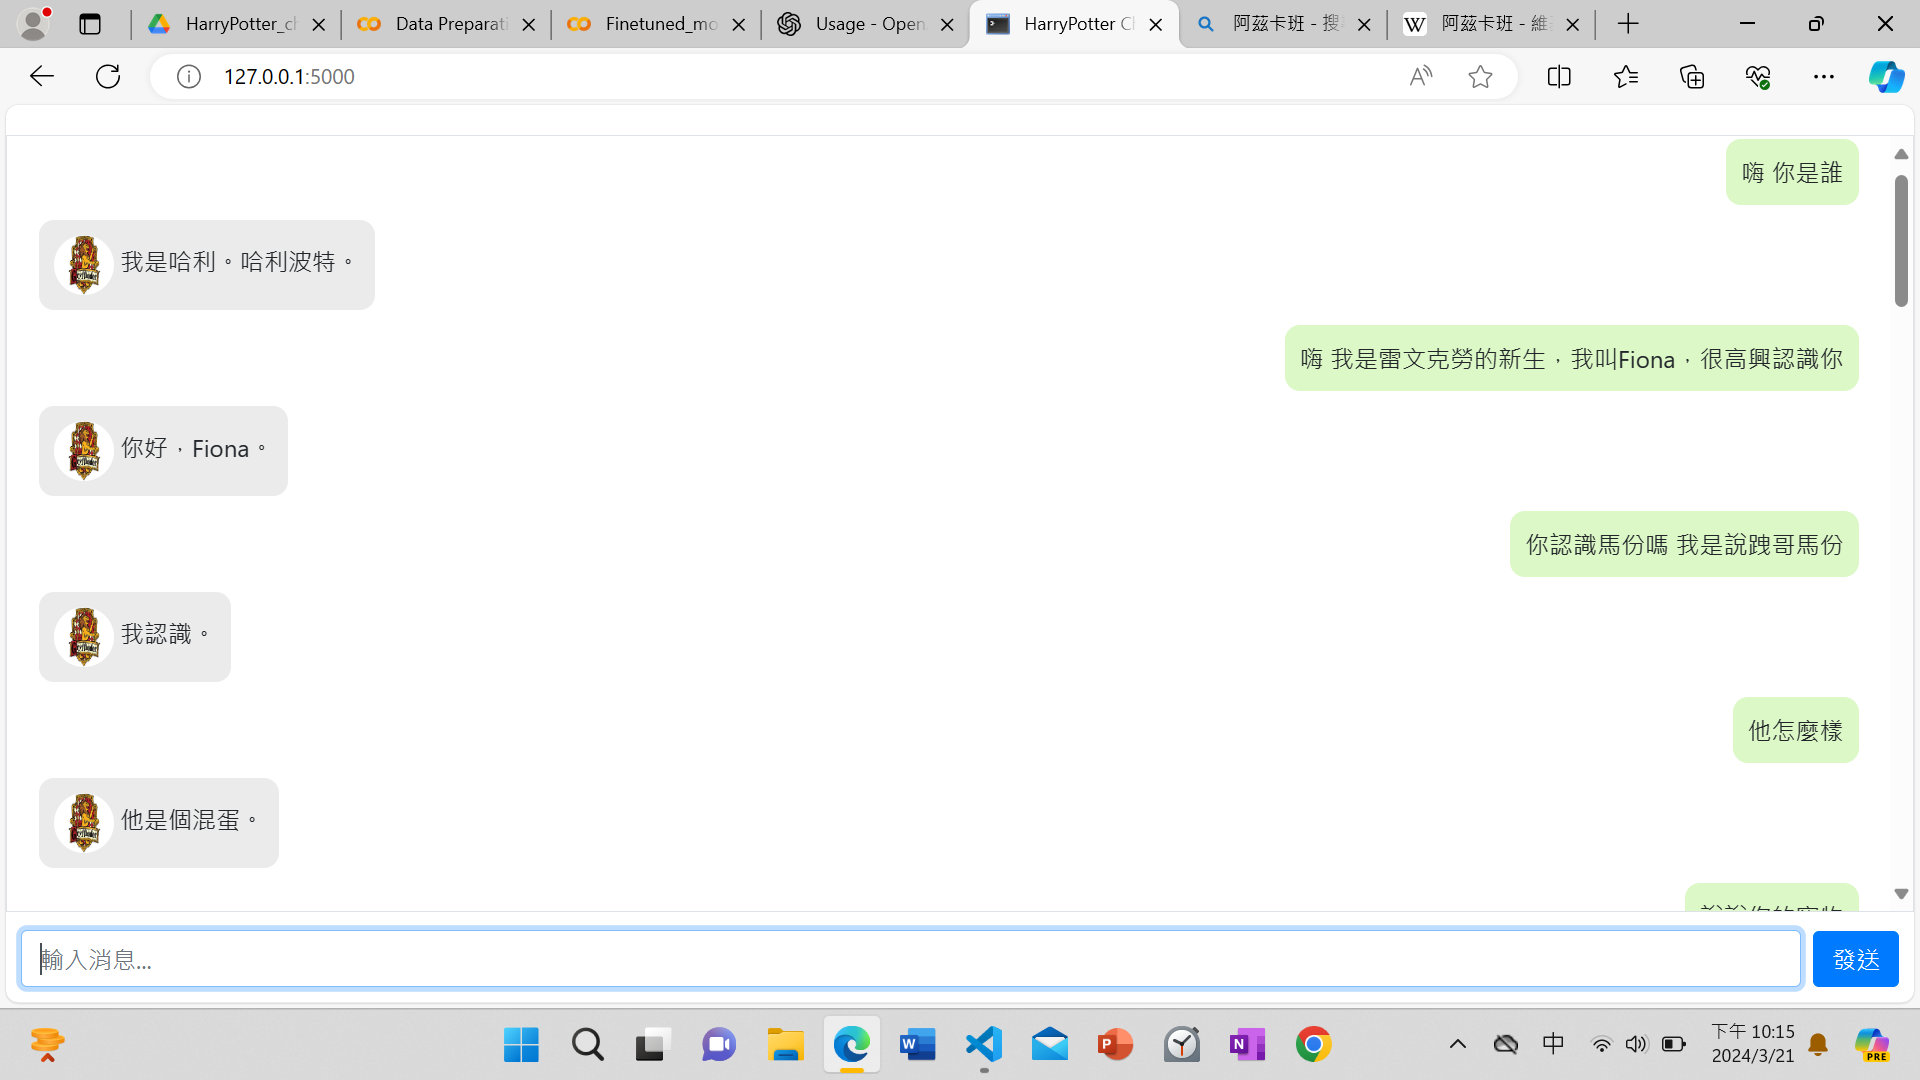

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/Version2_conversation.png'))

# 第三次 fine-tune: Version 3

In [ ]:
# Check the previous learning rate and other parameters of version 2
response = client.fine_tuning.jobs.retrieve('ftjob-OJPYT3b4PEAuWZAn10Vk9vDC')


# This will print out the hyperparameters used for the fine-tuning job.
print(response.hyperparameters)

Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2)


藉由調整係數取得更好的訓練結果 調降learning rate

In [ ]:
client.fine_tuning.jobs.create(
  training_file="file-EK7HFKFxELxOtJwJQmuDdqT0",
  validation_file="file-MrCzfYlAHIv8g7vS89oBwmWK",
  model="gpt-3.5-turbo",
  hyperparameters={
      'n_epochs':3,
      'batch_size':1,
      'learning_rate_multiplier':1.6
  }
)

FineTuningJob(id='ftjob-q2ATVPmQhEwHVLLs8WDiwKYl', created_at=1711069440, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=1.6), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
response = response = client.fine_tuning.jobs.retrieve('ftjob-q2ATVPmQhEwHVLLs8WDiwKYl')
response

FineTuningJob(id='ftjob-q2ATVPmQhEwHVLLs8WDiwKYl', created_at=1711069440, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::95NuZTPR', finished_at=1711070583, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=1.6), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-9JGMa2VmXP2UiexAsBa5THWR'], status='succeeded', trained_tokens=42162, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::95NuZTPR


# 第四次fine-tune: Version 4

藉由調整係數取得更好的訓練結果
調降n_cpochs

Let's set the n_epochs = 2, learning_rate_multiplier = 1.6

- **Epochs = 2**: If the previous model showed signs of overfitting, reducing the number of epochs may help to prevent the model from learning the noise in the training set. However, you need to ensure that the model still learns effectively. If the training loss continues to significantly decrease without an increase in validation loss towards the end of training, it might be a sign you can train for longer without overfitting.

- **Learning rate = 1.6**: If this value is a multiplier and the base learning rate is appropriate for the model architecture, this could be a reasonable adjustment. A slightly lower learning rate can sometimes improve generalization if the model was previously overfitting.

- **Batch size = 1**: This is quite an aggressive setting. It means you're using stochastic gradient descent, which can be good for escaping local minima and might help with generalization. However, training could be very noisy and take a long time. You might want to try a slightly larger batch size to balance the benefits of noise against the efficiency and stability of training.

Remember that these are educated guesses. The only way to know for sure if these are the right values is to try them out and carefully monitor the model's performance. Ideally, you want to set up a validation framework where you can observe how tweaks to the parameters affect both training and validation loss. If validation loss decreases without a corresponding decrease in training loss, or if validation loss starts to increase, these are classic signs of overfitting.

Furthermore, depending on your computational resources and the time you can allocate to training, you might want to run a hyperparameter search using tools like grid search, random search, or even more sophisticated methods like Bayesian optimization to find the best combination of parameters.

Lastly, always make sure that any changes you make are driven by a clear understanding of the model's current performance. Look at your training and validation curves, and make decisions based on where you see the model underfitting or overfitting.

In [ ]:
client.fine_tuning.jobs.create(
  training_file="file-EK7HFKFxELxOtJwJQmuDdqT0",
  validation_file="file-MrCzfYlAHIv8g7vS89oBwmWK",
  model="gpt-3.5-turbo",
  hyperparameters={
      'n_epochs':2,
      'batch_size':1,
      'learning_rate_multiplier':1.6
  }
)

FineTuningJob(id='ftjob-Ywl4LJLtHBI5S2QBDxvwb8IN', created_at=1711067996, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=2, batch_size=1, learning_rate_multiplier=1.6), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
response = client.fine_tuning.jobs.retrieve('ftjob-Ywl4LJLtHBI5S2QBDxvwb8IN')
response

FineTuningJob(id='ftjob-Ywl4LJLtHBI5S2QBDxvwb8IN', created_at=1711067996, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::95NWBZG6', finished_at=1711069070, hyperparameters=Hyperparameters(n_epochs=2, batch_size=1, learning_rate_multiplier=1.6), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-JF14QtuSJCgwKlFjfy8Xr1Xo'], status='succeeded', trained_tokens=28108, training_file='file-EK7HFKFxELxOtJwJQmuDdqT0', validation_file='file-MrCzfYlAHIv8g7vS89oBwmWK', user_provided_suffix=None)

In [ ]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::95NWBZG6


# 第五次fine-tune: Version 5

使用沒有system content設定的資料集

In [ ]:
import pandas as pd
import json

# Load the fine-tuning data
with open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_file2.jsonl', 'r') as file:
    lines = file.readlines()
    fine_tune_data = [json.loads(line) for line in lines]

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(fine_tune_data)

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)

# Define the size of the validation set
validation_size = int(0.1 * len(df_shuffled))  # 10% for validation

# Split into training and validation sets
validation_data = df_shuffled[:validation_size]
training_data = df_shuffled[validation_size:]

# Convert back to list of dict format for saving as JSONL
training_data_records = training_data.to_dict(orient='records')
validation_data_records = validation_data.to_dict(orient='records')

# Function to save data in JSONL format
def save_jsonl(data_records, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for record in data_records:
            file.write(json.dumps(record, ensure_ascii=False) + '\n')

# Save the training and validation data
save_jsonl(training_data_records, '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data2.jsonl')
save_jsonl(validation_data_records, '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data2.jsonl')

# Return paths to saved files
('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data2.jsonl', '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data2.jsonl')


('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data2.jsonl',
 '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data2.jsonl')

In [ ]:
# Training data (without system content)
client.files.create(
  file=open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/training_data2.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-QphvDr6d7IqMAeCK74mh8kuL', bytes=26865, created_at=1711071057, filename='training_data2.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
# Validation data (without system content)
client.files.create(
  file=open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/validation_data2.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-ukYqaNzvlApP1YLIxe6f5BdS', bytes=3105, created_at=1711071077, filename='validation_data2.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
client.fine_tuning.jobs.create(
  training_file="file-QphvDr6d7IqMAeCK74mh8kuL",
  validation_file="file-ukYqaNzvlApP1YLIxe6f5BdS",
  model="gpt-3.5-turbo",
)

FineTuningJob(id='ftjob-aVdlifvJVXTiZ1gr5wufWoBL', created_at=1711074994, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-QphvDr6d7IqMAeCK74mh8kuL', validation_file='file-ukYqaNzvlApP1YLIxe6f5BdS', user_provided_suffix=None)

In [ ]:
response = client.fine_tuning.jobs.retrieve('ftjob-aVdlifvJVXTiZ1gr5wufWoBL')
response

FineTuningJob(id='ftjob-aVdlifvJVXTiZ1gr5wufWoBL', created_at=1711074994, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::95PWXy5S', finished_at=1711076780, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-tlecK4ynn0HJJNiY7bt4S2dZ'], status='succeeded', trained_tokens=22389, training_file='file-QphvDr6d7IqMAeCK74mh8kuL', validation_file='file-ukYqaNzvlApP1YLIxe6f5BdS', user_provided_suffix=None)

In [ ]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::95PWXy5S


# 第六次fine-tune: Version 6

將version 4進行第二次finetune

In [7]:
import random

# Function to split data into training and validation sets
def split_data(data, train_ratio=0.8):
    # Shuffle data to ensure random distribution
    random.shuffle(data)
    # Calculate the number of training samples
    train_size = int(len(data) * train_ratio)
    # Split the data
    train_data = data[:train_size]
    validation_data = data[train_size:]
    return train_data, validation_data

# Load the corrected JSONL file content
with open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_character.jsonl', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Split the data
train_data, validation_data = split_data(lines)

# Save the training and validation data to new JSONL files
train_file_path = '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_character_training.jsonl'
validation_file_path = '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_character_validation.jsonl'

with open(train_file_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_data)

with open(validation_file_path, 'w', encoding='utf-8') as validation_file:
    validation_file.writelines(validation_data)

# Output paths to the saved files and their sizes
train_file_path, validation_file_path, len(train_data), len(validation_data)


('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_character_training.jsonl',
 '/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/finetune_character_validation.jsonl',
 98,
 25)

In [14]:
# Training data
client.files.create(
  file=open('/content/drive/MyDrive/Colab Notebooks/HarryPotter_chatbot/character_training.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-R7s9pv53nhcq6ohmxJZdM3RF', bytes=35824, created_at=1711167172, filename='character_training.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [15]:
# Validation data
client.files.create(
  file=open('/content/character_validation.jsonl', "rb"),
  purpose="fine-tune"
)

FileObject(id='file-UYv6hxXBVfvpTPzBQYOlkAhn', bytes=9000, created_at=1711167175, filename='character_validation.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [16]:
client.fine_tuning.jobs.create(
  training_file="file-R7s9pv53nhcq6ohmxJZdM3RF",
  validation_file="file-UYv6hxXBVfvpTPzBQYOlkAhn",
  model="ft:gpt-3.5-turbo-0125:personal::95NWBZG6",
)

FineTuningJob(id='ftjob-Xkt8KX1pUnfAcW99NvvNDCTs', created_at=1711167200, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='ft:gpt-3.5-turbo-0125:personal::95NWBZG6', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-R7s9pv53nhcq6ohmxJZdM3RF', validation_file='file-UYv6hxXBVfvpTPzBQYOlkAhn', user_provided_suffix=None)

In [21]:
response = client.fine_tuning.jobs.retrieve('ftjob-Xkt8KX1pUnfAcW99NvvNDCTs')
response

FineTuningJob(id='ftjob-Xkt8KX1pUnfAcW99NvvNDCTs', created_at=1711167200, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::95nHAma0', finished_at=1711168083, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='ft:gpt-3.5-turbo-0125:personal::95NWBZG6', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-BTwaTlj1wcf9FgeovgmvqKMm'], status='succeeded', trained_tokens=40443, training_file='file-R7s9pv53nhcq6ohmxJZdM3RF', validation_file='file-UYv6hxXBVfvpTPzBQYOlkAhn', user_provided_suffix=None)

In [22]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::95nHAma0


# 第七次fine-tune: Version 7

使用gpt-3.5-turbo搭配character data進行fine-tune

In [18]:
client.fine_tuning.jobs.create(
  training_file="file-R7s9pv53nhcq6ohmxJZdM3RF",
  validation_file="file-UYv6hxXBVfvpTPzBQYOlkAhn",
  model="gpt-3.5-turbo",
)

FineTuningJob(id='ftjob-56cNmCQPPLg7yd8F32dU2h1X', created_at=1711167243, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=[], status='validating_files', trained_tokens=None, training_file='file-R7s9pv53nhcq6ohmxJZdM3RF', validation_file='file-UYv6hxXBVfvpTPzBQYOlkAhn', user_provided_suffix=None)

In [23]:
response = client.fine_tuning.jobs.retrieve('ftjob-56cNmCQPPLg7yd8F32dU2h1X')
response

FineTuningJob(id='ftjob-56cNmCQPPLg7yd8F32dU2h1X', created_at=1711167243, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::95nHxFiY', finished_at=1711168132, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-sWxCOiTIiWmVUWskwy5zliGU', result_files=['file-VQz2UJym5Bs7aLOhtqLN8dMh'], status='succeeded', trained_tokens=40443, training_file='file-R7s9pv53nhcq6ohmxJZdM3RF', validation_file='file-UYv6hxXBVfvpTPzBQYOlkAhn', user_provided_suffix=None)

In [24]:
fine_tuned_model_id = response.fine_tuned_model
print('finetuned model id: ', fine_tuned_model_id)

finetuned model id:  ft:gpt-3.5-turbo-0125:personal::95nHxFiY
